In [1]:
# mount drive to collab
from google.colab import drive
drive.mount('/content/drive')

import sys
import os

py_file_location = '/content/drive/MyDrive/AAAI25/'

sys.path.append(os.path.abspath(py_file_location))

Mounted at /content/drive


In [34]:
import matplotlib.pyplot as plt
import torchvision

def plot_imgs(imgs):
    imgs = torchvision.utils.make_grid(np.clip(imgs, 0,1), nrow=5).numpy()
    plt.imshow(np.transpose(imgs, (1, 2, 0)))
    plt.axis('off')  # Turn off axis labels and ticks

In [30]:
import numpy as np
from datasets import satellite_dataloader
from src.augmentation import sat_trivial

img_dir = '/content/drive/MyDrive/AAAI25/test_imgs/'
label_path = '/content/drive/MyDrive/AAAI25/euroSAT_labels_mini.csv'

means = np.array([0.04355348, 0.0354724, 0.03290852])

dataloader = satellite_dataloader('rgb', img_dir, label_path, split='train',
                  size=64, img_ext='jpg', bands=3, task='eurosat',
                  augment=True, augment_type=['Sat-Trivial'], batch_size=5,
                  shuffle=True, num_workers=1, means=means)

split: train
len ids: 5


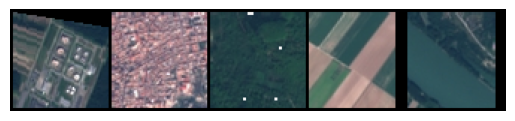

In [38]:
# get some random training images
dataiter = iter(dataloader)
images, labels, _ = next(dataiter)

# plot results
plot_imgs(images.cpu())